In [1]:
import pandas as pd 

data_main=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.12.04/gait/gait_norm.xlsx")

data=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.12.04/gait/gait_norm_drop.xlsx")


In [2]:
data_main

,Unnamed: 0,FORCE_B(Right),FORCE_C(Left),FSR_C(Left)
0,0,0.075826,0.112789,0.030441
1,1,0.105638,0.127442,0.031963
2,2,0.112767,0.144760,0.033486
3,3,0.132210,0.154529,0.036530
4,4,0.162670,0.163410,0.044140
...,...,...,...,...
887,887,0.054439,0.114565,0.033486
888,888,0.070642,0.130107,0.038052
889,889,0.069994,0.141208,0.041096
890,890,0.085548,0.156306,0.041096


In [3]:
data

,Unnamed: 0,FORCE_B(Right),FORCE_C(Left),FSR_C(Left)
0,0,0.075826,0.112789,0.030441
1,1,0.105638,0.127442,0.031963
2,2,0.112767,0.144760,0.033486
3,3,0.132210,0.154529,0.036530
4,4,0.162670,0.163410,0.044140
...,...,...,...,...
887,887,0.054439,0.114565,0.033486
888,888,0.070642,0.130107,0.038052
889,889,NaN,NaN,NaN
890,890,0.085548,0.156306,0.041096


In [4]:
data_main.drop(columns=['Unnamed: 0'],inplace=True)
data.drop(columns=['Unnamed: 0'],inplace=True)

<Axes: >

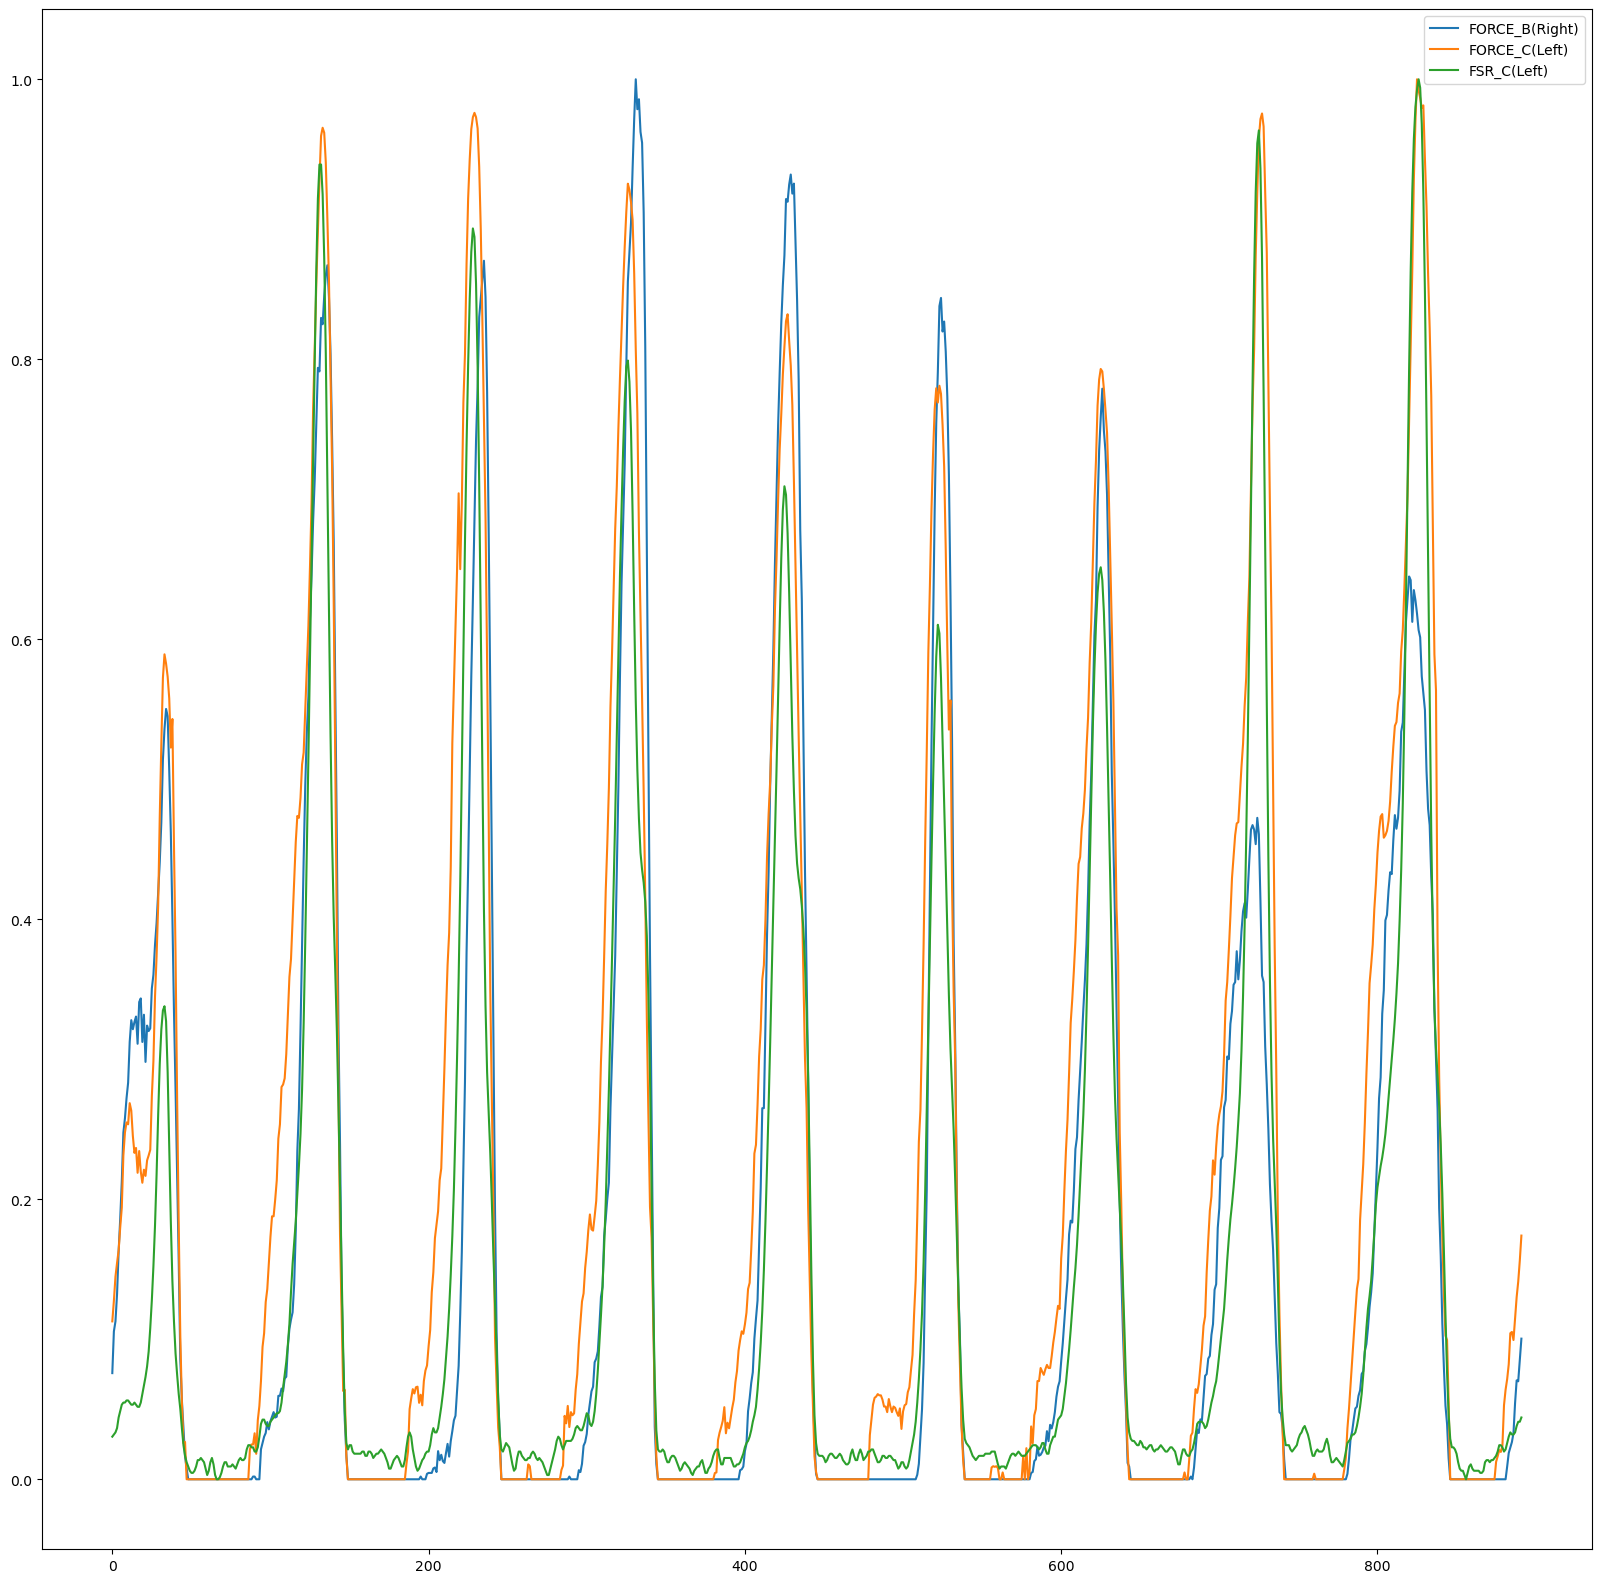

In [5]:
data_main.plot(figsize=(20,20))

<Axes: >

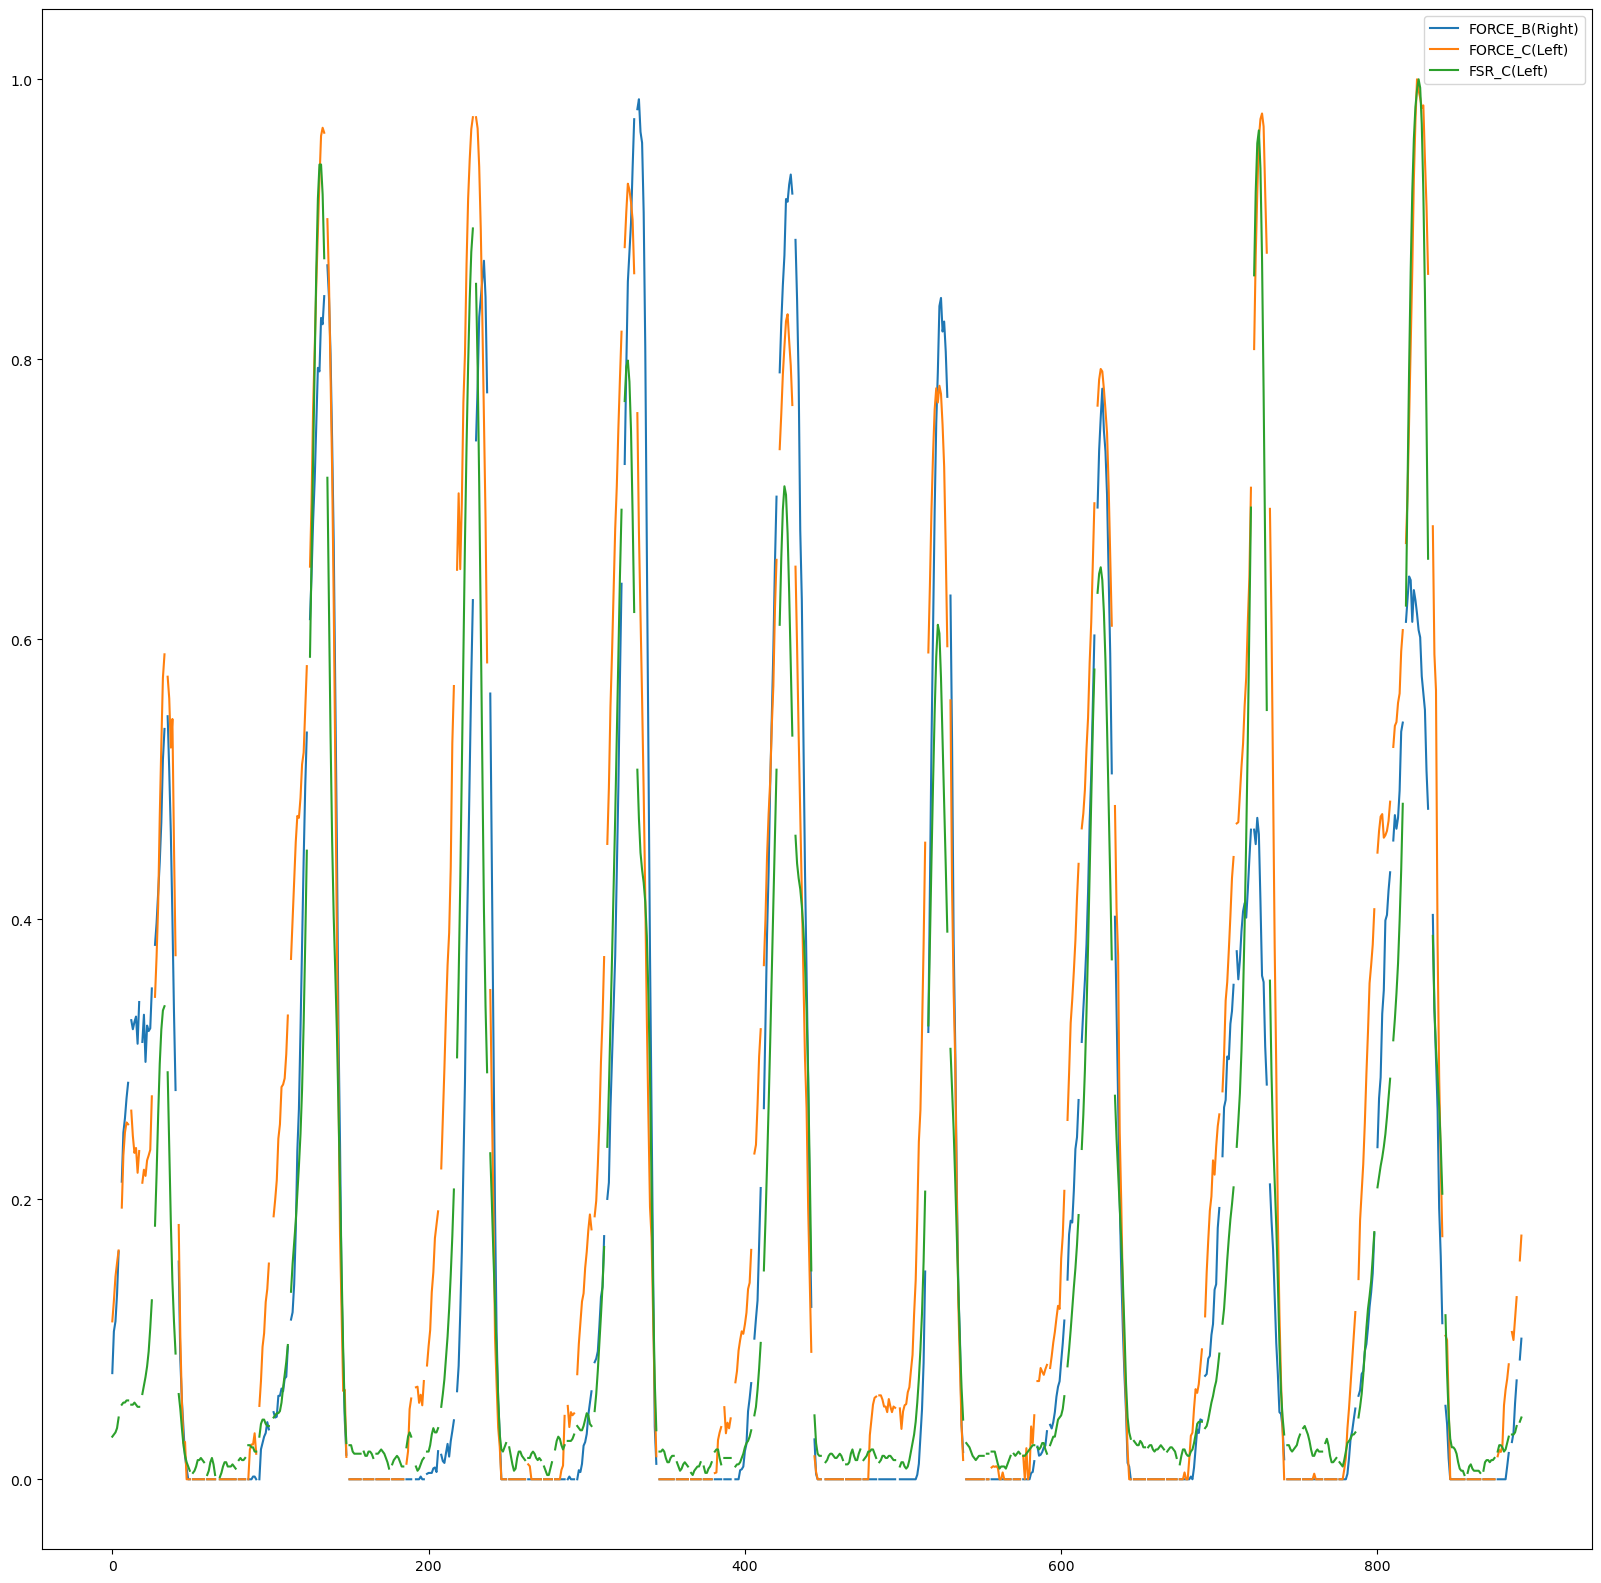

In [6]:
data.plot(figsize=(20,20))

In [7]:
print(data.isnull().sum())
print(data_main.isnull().sum())

FORCE_B(Right)    98
FORCE_C(Left)     98
FSR_C(Left)       98
dtype: int64
FORCE_B(Right)    0
FORCE_C(Left)     0
FSR_C(Left)       0
dtype: int64


FORCE_B(Right)


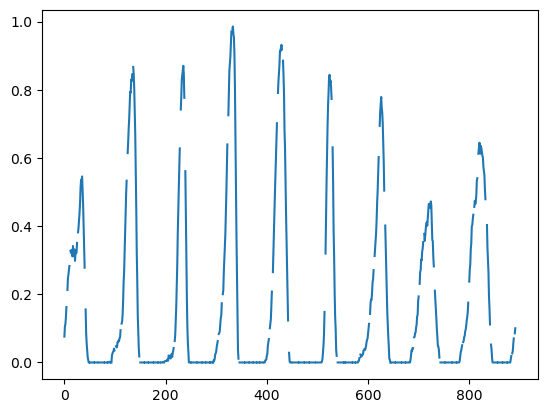

FORCE_C(Left)


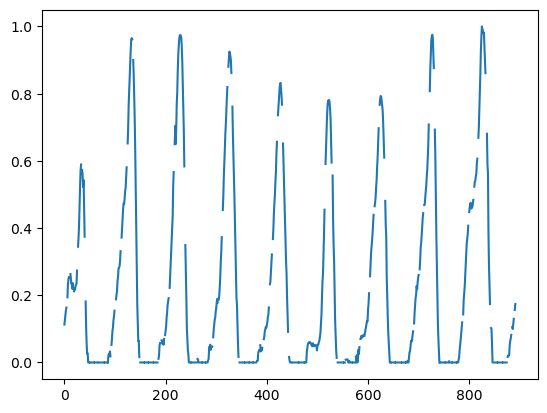

FSR_C(Left)


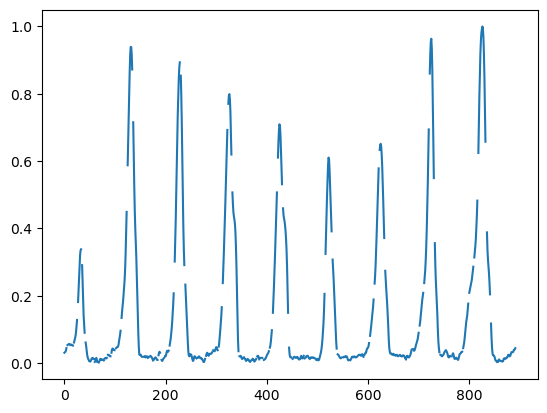

In [8]:
import matplotlib.pyplot as plt

columns=data.columns
count=0
for i in columns:
    print(columns[count])
    count=count+1
    plt.plot(data[i])
    plt.show()
    

In [9]:
## R_FORCE_B : FORCE_C(Left),
## R_FORCE_B : Force_C(Left).1

In [10]:
data_sca=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.12.04/gait/gait_data_fit_feature.xlsx")





In [11]:
data_sca.columns

Index(['Unnamed: 0', 'FORCE_B(Right)', 'FORCE_C(Left)', 'FSR_C(Left)'], dtype='object')

In [12]:
data_sca.drop(columns=["Unnamed: 0","FORCE_B(Right)"],inplace=True)

In [13]:
from sklearn.preprocessing import MinMaxScaler



scaler=MinMaxScaler()
R_scaled=scaler.fit_transform(data_sca)
L_scaled=pd.DataFrame(data=R_scaled)




R=data.loc[:,['FORCE_B(Right)']]
L=data.loc[:,['FORCE_C(Left)','FSR_C(Left)']]


<Axes: >

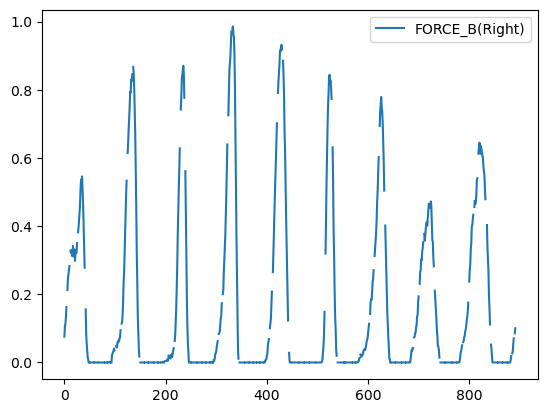

In [14]:
R.plot()

<Axes: >

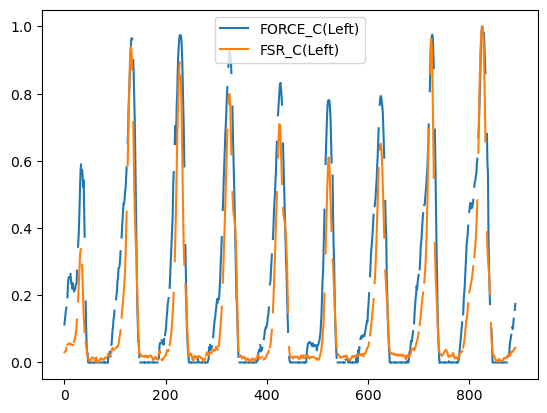

In [15]:
L.plot()

In [16]:
import numpy as np

index=R.index

loss_index_R_FORCE_B=np.array(R.index).reshape(-1,1)[R.iloc[:,0].isna()]


normal_index_R_FORCE_B=np.setdiff1d(index,loss_index_R_FORCE_B)


In [17]:
index=L.index

loss_index_L_FORCE_C=np.array(L.index).reshape(-1,1)[L.iloc[:,0].isna()]
loss_index_L_FSR_C=np.array(L.index).reshape(-1,1)[L.iloc[:,1].isna()]

normal_index_L_FORCE_C=np.setdiff1d(index,loss_index_L_FORCE_C)
normal_index_L_FSR_C=np.setdiff1d(index,loss_index_L_FSR_C)

In [18]:
## R_FORCE_B : L_XCOR_C
##  R_FORCE_B : L_FSR_C 

In [19]:
x_train_R_FORCE_B=normal_index_R_FORCE_B.reshape(-1,1)
y_train_L_FORCE_C=L.iloc[normal_index_L_FORCE_C,0]
x_test_L_FORCE_C=loss_index_L_FORCE_C

y_train_L_FSR_C=L.iloc[normal_index_L_FSR_C,1]
x_test_L_FSR_C=loss_index_L_FSR_C

L_FORCE_C=L.iloc[:,0].copy()
L_FSR_C=L.iloc[:,1].copy()

In [20]:
print(x_train_R_FORCE_B.shape)
print(y_train_L_FSR_C.shape)

(794, 1)
(794,)


In [21]:
x_train_R_FORCE_B=x_train_R_FORCE_B.reshape(x_train_R_FORCE_B.shape[0],x_train_R_FORCE_B.shape[1],1)
x_test_L_FORCE_C=x_test_L_FORCE_C.reshape(x_test_L_FORCE_C.shape[0],x_test_L_FORCE_C.shape[1],1)
x_test_L_FSR_C=x_test_L_FSR_C.reshape(x_test_L_FSR_C.shape[0],x_test_L_FSR_C.shape[1],1)

In [22]:
print(x_test_L_FORCE_C.shape)
print(x_test_L_FSR_C.shape)

(98, 1, 1)
(98, 1, 1)


In [23]:
#Trial 12 finished with value: 0.02816432278967291 and parameters: {'batch_size': 85, 'steps_per_epoch': 7, 'epochs': 3347, 'filter': 67, 'lstm_par1': 175, 'lstm_par2': 178, 'lstm_par3': 213, 'dense_par': 131, 'dense_par1': 167, 'dense_par2': 127, 'dense_par3': 125, 'dim1': 3, 'dim2': 1, 'dim3': 7, 'dim4': 8}. Best is trial 12 with value: 0.02816432278967291.

In [36]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM
from tensorflow.keras import layers
from keras.layers import Activation, Dense
import tensorflow as tf 
from tensorflow.keras import Model
from keras.layers import Dropout
from keras.layers import Dense, Input, TimeDistributed, Flatten
from keras.layers.convolutional import Conv1D ,MaxPooling1D
from keras.optimizers import adam
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM
from keras.layers import Bidirectional

model_cnnbilstm = Sequential()
model_cnnbilstm.add(TimeDistributed(Conv1D(filters=120, kernel_size=1, activation='relu'), input_shape=(None, x_train_R_FORCE_B.shape[1], x_train_R_FORCE_B.shape[2])))
model_cnnbilstm.add(TimeDistributed(MaxPooling1D(pool_size=1)))
model_cnnbilstm.add(TimeDistributed(Flatten()))
model_cnnbilstm.add(Bidirectional(LSTM(279, return_sequences=True,activation='relu')))
model_cnnbilstm.add(Bidirectional(LSTM(270, return_sequences=True,activation='relu')))
    #model_cnnbilstm.add(Bidirectional(LSTM(lstm_par3, return_sequences=True,dropout=drop3,activation='relu')))
    #model_cnnbilstm.add(Bidirectional(LSTM(lstm_par4, return_sequences=True,dropout=drop4,activation='relu')))
model_cnnbilstm.add(TimeDistributed(Dense(273, activation='relu',kernel_initializer = 'uniform',input_dim=7)))
model_cnnbilstm.add(TimeDistributed(Dense(222, activation='relu',kernel_initializer = 'uniform',input_dim=6)))
model_cnnbilstm.add(TimeDistributed(Dense(262, activation='relu',kernel_initializer = 'uniform',input_dim=6)))
model_cnnbilstm.add(TimeDistributed(Dense(213, activation='relu',kernel_initializer = 'uniform',input_dim=3)))
model_cnnbilstm.add(TimeDistributed(Flatten()))
model_cnnbilstm.add(Dense(1))
model_cnnbilstm.compile(loss='mse', optimizer='adam')
model_cnnbilstm.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_48 (TimeDi  (None, None, 1, 120)     240       
 stributed)                                                      
                                                                 
 time_distributed_49 (TimeDi  (None, None, 1, 120)     0         
 stributed)                                                      
                                                                 
 time_distributed_50 (TimeDi  (None, None, 120)        0         
 stributed)                                                      
                                                                 
 bidirectional_12 (Bidirecti  (None, None, 558)        892800    
 onal)                                                           
                                                                 
 bidirectional_13 (Bidirecti  (None, None, 540)       

In [37]:
model_cnnbilstm.fit(x_train_R_FORCE_B,y_train_L_FORCE_C,epochs=10000,verbose=2,batch_size=100,steps_per_epoch=5)
pred=model_cnnbilstm.predict(x_test_L_FORCE_C)
pred=pred.reshape(-1,1)

Epoch 1/10000


5/5 - 5s - loss: 0.1233 - 5s/epoch - 903ms/step
Epoch 2/10000
5/5 - 0s - loss: 0.0944 - 210ms/epoch - 42ms/step
Epoch 3/10000
5/5 - 0s - loss: 0.1011 - 139ms/epoch - 28ms/step
Epoch 4/10000
5/5 - 0s - loss: 0.0967 - 126ms/epoch - 25ms/step
Epoch 5/10000
5/5 - 0s - loss: 0.0903 - 124ms/epoch - 25ms/step
Epoch 6/10000
5/5 - 0s - loss: 0.0862 - 202ms/epoch - 40ms/step
Epoch 7/10000
5/5 - 0s - loss: 0.1031 - 179ms/epoch - 36ms/step
Epoch 8/10000
5/5 - 0s - loss: 0.0951 - 193ms/epoch - 39ms/step
Epoch 9/10000
5/5 - 0s - loss: 0.0815 - 142ms/epoch - 28ms/step
Epoch 10/10000
5/5 - 0s - loss: 0.0922 - 145ms/epoch - 29ms/step
Epoch 11/10000
5/5 - 0s - loss: 0.0833 - 236ms/epoch - 47ms/step
Epoch 12/10000
5/5 - 0s - loss: 0.0914 - 345ms/epoch - 69ms/step
Epoch 13/10000
5/5 - 0s - loss: 0.0821 - 266ms/epoch - 53ms/step
Epoch 14/10000
5/5 - 0s - loss: 0.0893 - 256ms/epoch - 51ms/step
Epoch 15/10000
5/5 - 0s - loss: 0.0827 - 249ms/epoch - 50ms/step
Epoch 16/10000
5/5 - 0s - loss: 0.0866 - 121ms/epo

In [38]:
c=0
for i in loss_index_L_FORCE_C:    
    L_FORCE_C[i]=pred[c]
    c+=1

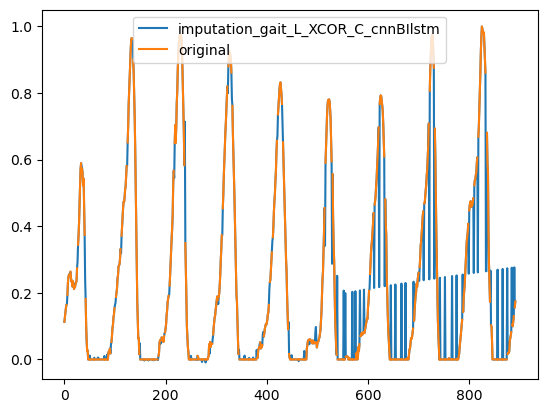

In [39]:
import matplotlib.pyplot as plt 
plt.plot(L_FORCE_C,label='imputation_gait_L_XCOR_C_cnnBIlstm')
plt.plot(L.iloc[:,0],label='original')
plt.legend()

In [40]:
#[I 2023-12-04 17:05:57,008] Trial 19 finished with value: 0.06918472931749974 and parameters: {'batch_size': 88, 'steps_per_epoch': 6, 'epochs': 3311, 'filter': 180, 'lstm_par1': 155, 'lstm_par2': 181, 'dense_par': 194, 'dense_par1': 117, 'dense_par2': 199, 'dense_par3': 149, 'dim1': 4, 'dim2': 7, 'dim3': 7, 'dim4': 7}. Best is trial 18 with value: 0.04039629413565714.
#{'batch_size': 89, 'steps_per_epoch': 9, 'epochs': 4289, 'filter': 165, 'lstm_par1': 153, 'lstm_par2': 184, 'dense_par': 198, 'dense_par1': 117, 'dense_par2': 200, 'dense_par3': 162, 'dim1': 7, 'dim2': 7, 'dim3': 6, 'dim4': 4}



In [41]:
model_cnnbilstm = Sequential()
model_cnnbilstm.add(TimeDistributed(Conv1D(filters=165, kernel_size=1, activation='relu'), input_shape=(None, x_train_R_FORCE_B.shape[1], x_train_R_FORCE_B.shape[2])))
model_cnnbilstm.add(TimeDistributed(MaxPooling1D(pool_size=1)))
model_cnnbilstm.add(TimeDistributed(Flatten()))
model_cnnbilstm.add(Bidirectional(LSTM(153, return_sequences=True,activation='relu')))
model_cnnbilstm.add(Bidirectional(LSTM(184, return_sequences=True,activation='relu')))
    #model_cnnbilstm.add(Bidirectional(LSTM(lstm_par3, return_sequences=True,dropout=drop3,activation='relu')))
    #model_cnnbilstm.add(Bidirectional(LSTM(lstm_par4, return_sequences=True,dropout=drop4,activation='relu')))
model_cnnbilstm.add(TimeDistributed(Dense(198, activation='relu',kernel_initializer = 'uniform',input_dim=7)))
model_cnnbilstm.add(TimeDistributed(Dense(117, activation='relu',kernel_initializer = 'uniform',input_dim=7)))
model_cnnbilstm.add(TimeDistributed(Dense(200, activation='relu',kernel_initializer = 'uniform',input_dim=6)))
model_cnnbilstm.add(TimeDistributed(Dense(162, activation='relu',kernel_initializer = 'uniform',input_dim=4)))
model_cnnbilstm.add(TimeDistributed(Flatten()))
model_cnnbilstm.add(Dense(1))
model_cnnbilstm.compile(loss='mse', optimizer='adam')
model_cnnbilstm.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_56 (TimeDi  (None, None, 1, 165)     330       
 stributed)                                                      
                                                                 
 time_distributed_57 (TimeDi  (None, None, 1, 165)     0         
 stributed)                                                      
                                                                 
 time_distributed_58 (TimeDi  (None, None, 165)        0         
 stributed)                                                      
                                                                 
 bidirectional_14 (Bidirecti  (None, None, 306)        390456    
 onal)                                                           
                                                                 
 bidirectional_15 (Bidirecti  (None, None, 368)       

In [42]:
model_cnnbilstm.fit(x_train_R_FORCE_B,y_train_L_FSR_C,epochs=10000,verbose=2,batch_size=178,steps_per_epoch=3)

Epoch 1/10000
3/3 - 4s - loss: 0.0675 - 4s/epoch - 1s/step
Epoch 2/10000
3/3 - 0s - loss: 0.0573 - 55ms/epoch - 18ms/step
Epoch 3/10000
3/3 - 0s - loss: 0.0749 - 51ms/epoch - 17ms/step
Epoch 4/10000
3/3 - 0s - loss: 0.0517 - 73ms/epoch - 24ms/step
Epoch 5/10000
3/3 - 0s - loss: 0.0657 - 57ms/epoch - 19ms/step
Epoch 6/10000
3/3 - 0s - loss: 0.0611 - 66ms/epoch - 22ms/step
Epoch 7/10000
3/3 - 0s - loss: 0.0546 - 92ms/epoch - 31ms/step
Epoch 8/10000
3/3 - 0s - loss: 0.0589 - 101ms/epoch - 34ms/step
Epoch 9/10000
3/3 - 0s - loss: 0.0610 - 87ms/epoch - 29ms/step
Epoch 10/10000
3/3 - 0s - loss: 0.0506 - 64ms/epoch - 21ms/step
Epoch 11/10000
3/3 - 0s - loss: 0.0574 - 61ms/epoch - 20ms/step
Epoch 12/10000
3/3 - 0s - loss: 0.0542 - 52ms/epoch - 17ms/step
Epoch 13/10000
3/3 - 0s - loss: 0.0573 - 67ms/epoch - 22ms/step
Epoch 14/10000
3/3 - 0s - loss: 0.0508 - 49ms/epoch - 16ms/step
Epoch 15/10000
3/3 - 0s - loss: 0.0606 - 73ms/epoch - 24ms/step
Epoch 16/10000
3/3 - 0s - loss: 0.0601 - 108ms/epoch

In [43]:
pred=model_cnnbilstm.predict(x_test_L_FSR_C)
pred=pred.reshape(-1,1)

4/4 [==============================] - 1s 3ms/step


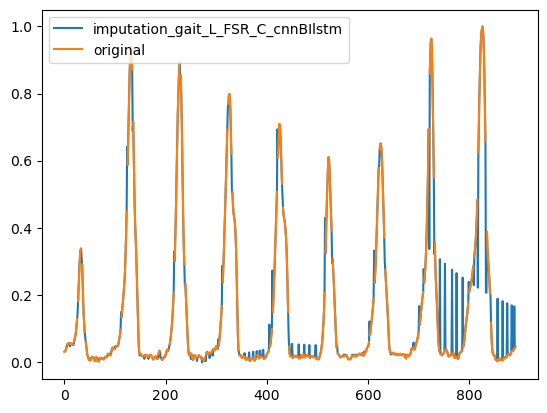

In [44]:
c=0
for i in loss_index_L_FSR_C:    
    L_FSR_C[i]=pred[c]
    c+=1
    
    
plt.plot(L_FSR_C,label='imputation_gait_L_FSR_C_cnnBIlstm')
plt.plot(L.iloc[:,1],label='original')
plt.legend()

In [45]:
import numpy as np

def RMSE(data,pred):
    n=len(data)
    return np.sqrt((np.sum((data-pred)**2))/n)

print(RMSE(data_main['FORCE_C(Left)'],L_FORCE_C))
print(RMSE(data_main['FSR_C(Left)'],L_FSR_C))

0.05860154572011048
0.03557794972808651


In [46]:
L.columns

Index(['FORCE_C(Left)', 'FSR_C(Left)'], dtype='object')

In [47]:
L=data.loc[:,['FORCE_C(Left)','FSR_C(Left)']]

In [48]:
L.isnull().sum()

FORCE_C(Left)    98
FSR_C(Left)      98
dtype: int64

In [49]:
for i in loss_index_L_FORCE_C:    
    L['FORCE_C(Left)'][i]=L_FORCE_C[i]
    
for i in loss_index_L_FSR_C:    
    L['FSR_C(Left)'][i]=L_FSR_C[i]

In [50]:
L.isnull().sum()

FORCE_C(Left)    0
FSR_C(Left)      0
dtype: int64

<Axes: >

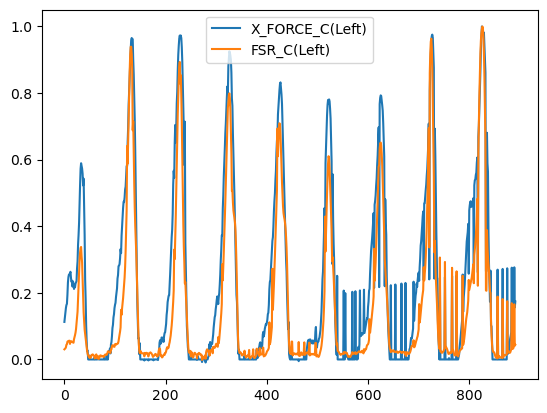

In [51]:
L=L.set_axis(["X_FORCE_C(Left)","FSR_C(Left)"],axis="columns")
L.plot()

<Axes: >

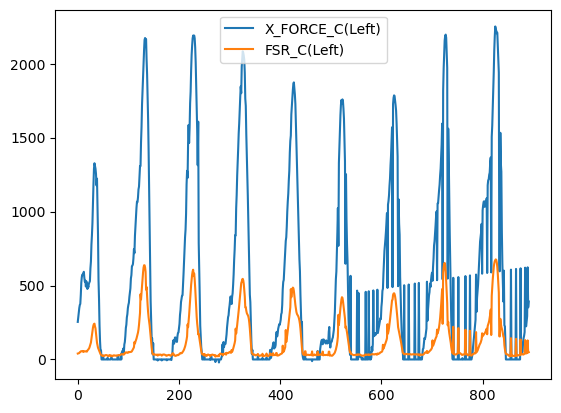

In [52]:
L = pd.DataFrame(scaler.inverse_transform(L))
L_sca=L.set_axis(["X_FORCE_C(Left)","FSR_C(Left)"],axis="columns")
L_sca.plot()